In [13]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.datasets import load_iris
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import plot_confusion_matrix

In [2]:
iris=load_iris()

In [3]:
X =iris['data']
y = iris['target']

In [4]:
from sklearn.preprocessing import MinMaxScaler
pca=PCA(n_components=2)
escala=MinMaxScaler()
escalada=escala.fit_transform(X)
Xpca=pca.fit_transform(escalada)

In [5]:
X_train, X_test, y_train, y_test = train_test_split(Xpca, y, test_size=0.3)

In [11]:
clf = svm.SVC(kernel='linear') # Linear Kernel
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

In [12]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9555555555555556


Confusion matrix, without normalization
[[16  0  0]
 [ 0 13  1]
 [ 0  1 14]]
Normalized confusion matrix
[[1.         0.         0.        ]
 [0.         0.92857143 0.07142857]
 [0.         0.06666667 0.93333333]]


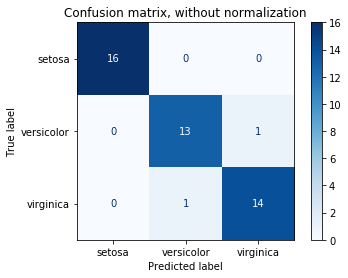

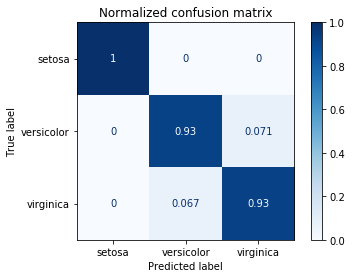

In [14]:
class_names = iris.target_names
# Plot non-normalized confusion matrix
titles_options = [("Confusion matrix, without normalization", None),
                  ("Normalized confusion matrix", 'true')]
for title, normalize in titles_options:
    disp = plot_confusion_matrix(clf, X_test, y_test,
                                 display_labels=class_names,
                                 cmap=plt.cm.Blues,
                                 normalize=normalize)
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

plt.show()